In [1]:
import numpy as np
import pandas as pd

In [2]:
dates=np.arange(20170101,20170105)
df1=pd.DataFrame(np.arange(12).reshape(4,3),index=dates,columns=['A','B','C'])
df1

,A,B,C
20170101,0,1,2
20170102,3,4,5
20170103,6,7,8
20170104,9,10,11


In [3]:
df2=pd.DataFrame(df1,index=dates,columns=['A','B','C','D','E','F'])
df2

,A,B,C,D,E,F
20170101,0,1,2,NaN,NaN,NaN
20170102,3,4,5,NaN,NaN,NaN
20170103,6,7,8,NaN,NaN,NaN
20170104,9,10,11,NaN,NaN,NaN


In [7]:
s1=pd.Series([3,4,6],index=dates[:3])
s2=pd.Series([32,5,2],index=dates[1:])
df2['D']=s1
df2['E']=s2
df2

,A,B,C,D,E,F
20170101,0,1,2,3.0,NaN,NaN
20170102,3,4,5,4.0,32.0,NaN
20170103,6,7,8,6.0,5.0,NaN
20170104,9,10,11,NaN,2.0,NaN


In [15]:
# del df2['F']
df2
#去掉所有含空值的行
df2.dropna(axis=0,how='any')#axis=[0,1] 0代表行，1代表列，  how=['any','all'] any任意一个，all全部


,A,B,C,D,E
20170102,3,4,5,4.0,32.0
20170103,6,7,8,6.0,5.0


In [16]:
df2.fillna(value=0)#所有的空值赋值为0


,A,B,C,D,E
20170101,0,1,2,3.0,0.0
20170102,3,4,5,4.0,32.0
20170103,6,7,8,6.0,5.0
20170104,9,10,11,0.0,2.0


In [17]:
np.any(df2.isnull())#只要有一个空值就会返回true

True

In [19]:
np.any(df2.isna)

<bound method DataFrame.isna of           A   B   C    D     E
20170101  0   1   2  3.0   NaN
20170102  3   4   5  4.0  32.0
20170103  6   7   8  6.0   5.0
20170104  9  10  11  NaN   2.0>

### pandas读取和写入文件

In [21]:
file=pd.read_csv('people.csv',encoding='gbk')
file

,地点,名字,工资,在职情况
0,北京,小红,1500,在职
1,北京,小黄,5000,离职
2,北京,小白,56222,离职
3,上海,小黑,5666,在职
4,上海,小绿,4522,离职
5,上海,小蓝,1655,离职
6,广州,大黑,656666,离职
7,广州,小明,2322,在职
8,广州,小华,2333,离职
9,广州,小鸟,24666,离职


In [22]:
file.iloc[2,0]='深圳'
file

,地点,名字,工资,在职情况
0,北京,小红,1500,在职
1,北京,小黄,5000,离职
2,深圳,小白,56222,离职
3,上海,小黑,5666,在职
4,上海,小绿,4522,离职
5,上海,小蓝,1655,离职
6,广州,大黑,656666,离职
7,广州,小明,2322,在职
8,广州,小华,2333,离职
9,广州,小鸟,24666,离职


In [24]:
file.to_csv('people.csv')

### pandas数据合并concat

In [26]:
df1=pd.DataFrame(np.arange(12).reshape((3,4)),columns=['a','b','c','d'])
df2=pd.DataFrame(np.arange(12,24).reshape((3,4)),columns=['a','b','c','d'])
df3=pd.DataFrame(np.arange(24,36).reshape((3,4)),columns=['a','b','c','d'])
print(df1)
print(df2)
print(df3)

   a  b   c   d
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
    a   b   c   d
0  12  13  14  15
1  16  17  18  19
2  20  21  22  23
    a   b   c   d
0  24  25  26  27
1  28  29  30  31
2  32  33  34  35


In [27]:
df4=pd.concat([df1,df2,df3])#纵向合并

In [29]:
df4

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
0,12,13,14,15
1,16,17,18,19
2,20,21,22,23
0,24,25,26,27
1,28,29,30,31
2,32,33,34,35


In [30]:
df4=pd.concat([df1,df2,df3],axis=0,ignore_index=True)#纵向合并，不考虑原来的Index
df4

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19
5,20,21,22,23
6,24,25,26,27
7,28,29,30,31
8,32,33,34,35


In [31]:
df5=pd.concat([df1,df2,df3],axis=1)#横向合并
df5

,a,b,c,d,a,b,c,d,a,b,c,d
0,0,1,2,3,12,13,14,15,24,25,26,27
1,4,5,6,7,16,17,18,19,28,29,30,31
2,8,9,10,11,20,21,22,23,32,33,34,35


In [32]:
df1=pd.DataFrame(np.arange(12).reshape((3,4)),columns=['a','b','c','d'])
df2=pd.DataFrame(np.arange(12,24).reshape((3,4)),columns=['a','c','d','e'])
print(df1)
print(df2)

   a  b   c   d
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
    a   c   d   e
0  12  13  14  15
1  16  17  18  19
2  20  21  22  23


In [33]:
df6=pd.concat([df1,df2],join='outer',ignore_index=True)#合并两个表，缺少的部分填充为NaN

df6

,a,b,c,d,e
0,0,1.0,2,3,NaN
1,4,5.0,6,7,NaN
2,8,9.0,10,11,NaN
3,12,NaN,13,14,15.0
4,16,NaN,17,18,19.0
5,20,NaN,21,22,23.0


In [36]:
df6=pd.concat([df1,df2],join='inner',ignore_index=True)#合并两个表，缺少的部分丢掉
df6

,a,c,d
0,0,2,3
1,4,6,7
2,8,10,11
3,12,13,14
4,16,17,18
5,20,21,22


In [37]:
df1=pd.DataFrame(np.arange(12).reshape((3,4)),columns=['a','b','c','f'])
df2=pd.DataFrame(np.arange(12,24).reshape((4,3)),columns=['a','c','d'])
print(df1)
print(df2)

   a  b   c   f
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
    a   c   d
0  12  13  14
1  15  16  17
2  18  19  20
3  21  22  23


In [38]:
df8=pd.concat([df1,df2],axis=1,join_axes=[df1.index]) #横向合并，index使用df1的index
df8

,a,b,c,f,a,c,d
0,0,1,2,3,12,13,14
1,4,5,6,7,15,16,17
2,8,9,10,11,18,19,20


### 合并

In [39]:
left=pd.DataFrame({'key':['K0','K1','K2','K3'],
                 'A':['A0','A1','A2','A3'],
                  'B':['B0','B1','B2','B3']})
right=pd.DataFrame({'key':['K0','K1','K2','K3'],
                   'C':['C0','C1','C2','C3'],
                   'D':['D0','D1','D2','D3']})
print(left)
print(right)

    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K2
3  A3  B3  K3
    C   D key
0  C0  D0  K0
1  C1  D1  K1
2  C2  D2  K2
3  C3  D3  K3


In [41]:
res=pd.merge(left,right,on='key')   #根据相同列名合并
res

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


In [42]:
left=pd.DataFrame({'key1':['K0','K0','K1','K2'],
                   'key2':['K0','K1','K0','K1'],
                 'A':['A0','A1','A2','A3'],
                  'B':['B0','B1','B2','B3']})
right=pd.DataFrame({'key1':['K0','K1','K1','K3'],
                    'key2':['K0','K0','K0','K0'],
                   'C':['C0','C1','C2','C3'],
                   'D':['D0','D1','D2','D3']})
print(left)
print(right)

    A   B key1 key2
0  A0  B0   K0   K0
1  A1  B1   K0   K1
2  A2  B2   K1   K0
3  A3  B3   K2   K1
    C   D key1 key2
0  C0  D0   K0   K0
1  C1  D1   K1   K0
2  C2  D2   K1   K0
3  C3  D3   K3   K0


In [44]:
#  howw=['left','right','inner','outer']

#所有元素的集合
res=pd.merge(left,right,on=['key1','key2'],how='outer')#how默认是inner
res

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K2,K1,NaN,NaN
5,NaN,NaN,K3,K0,C3,D3


In [45]:
#  howw=['left','right','inner','outer']
#  左右两边公有的元素
res=pd.merge(left,right,on=['key1','key2'],how='inner')#how默认是inner  
res

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2


In [46]:
#  howw=['left','right','inner','outer']   
#   left 左边连接所有元素
res=pd.merge(left,right,on=['key1','key2'],how='left')#how默认是inner
res

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K2,K1,NaN,NaN


In [47]:
#  howw=['left','right','inner','outer']   
#   right 右边连接所有元素
res=pd.merge(left,right,on=['key1','key2'],how='right')#how默认是inner
res

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2
3,NaN,NaN,K3,K0,C3,D3


In [49]:
#  howw=['left','right','inner','outer']

#所有元素的集合
# indicator   最后一列显示merge的信息
res=pd.merge(left,right,on=['key1','key2'],how='outer',indicator=True)#how默认是inner
res

,A,B,key1,key2,C,D,_merge
0,A0,B0,K0,K0,C0,D0,both
1,A1,B1,K0,K1,NaN,NaN,left_only
2,A2,B2,K1,K0,C1,D1,both
3,A2,B2,K1,K0,C2,D2,both
4,A3,B3,K2,K1,NaN,NaN,left_only
5,NaN,NaN,K3,K0,C3,D3,right_only


In [54]:
left=pd.DataFrame({ 'A':['A0','A1','A2','A3'],
                  'B':['B0','B1','B2','B3']},index=['K0','K1','K2','K4'])
right=pd.DataFrame({'C':['C0','C1','C2','C3'],
                   'D':['D0','D1','D2','D3']},index=['K0','K1','K2','K3'] )
print(left)
print(right)


     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
K4  A3  B3
     C   D
K0  C0  D0
K1  C1  D1
K2  C2  D2
K3  C3  D3


In [55]:
res=pd.merge(left,right,left_index=True,right_index=True,how='outer')
res

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,C1,D1
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3
K4,A3,B3,NaN,NaN


In [56]:
res=pd.merge(left,right,left_index=True,right_index=True,how='inner')
res

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,C1,D1
K2,A2,B2,C2,D2


In [60]:
boys=pd.DataFrame({'k':['k0','k1','k2'],'age':[1,2,3]})
girls=pd.DataFrame({'k':['k0','k1','k4'],'age':[4,5,6]})
print(boys)
print(girls)

   age   k
0    1  k0
1    2  k1
2    3  k2
   age   k
0    4  k0
1    5  k1
2    6  k4


In [61]:
res=pd.merge(boys,girls,on='k',suffixes=['_boy','_girl'],how='outer')
res

,age_boy,k,age_girl
0,1.0,k0,4.0
1,2.0,k1,5.0
2,3.0,k2,NaN
3,NaN,k4,6.0


### pandas plot

In [62]:
import matplotlib.pyplot as plt

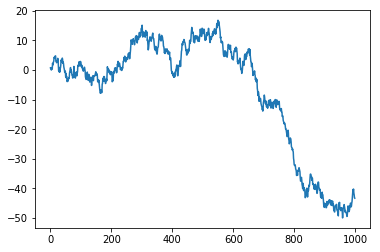

In [66]:
data=pd.Series(np.random.randn(1000),index=np.arange(1000))
data=data.cumsum()
data.plot()
plt.show()

In [68]:
data=pd.DataFrame(np.random.randn(1000,4),index=np.arange(1000),columns=['A','B','C','D'])
data=data.cumsum()
print(data.head())

          A         B         C         D
0 -0.112234 -0.588085  2.111564 -2.118687
1  0.185381  0.715199  2.917665 -1.607255
2 -1.199459  2.194461  3.733043 -3.374395
3 -0.747945  2.080786  2.964515 -3.202696
4  0.564234  1.232234  4.010407 -3.883676


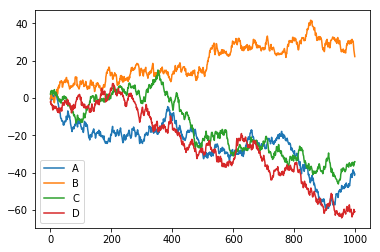

In [69]:
data.plot()
plt.show()

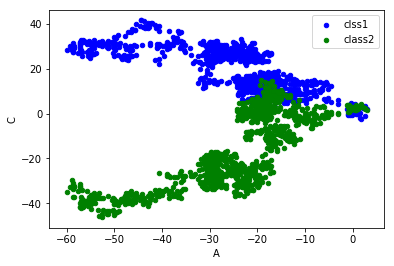

In [70]:
ax=data.plot.scatter(x='A',y='B',color='Blue',label='clss1')
data.plot.scatter(x='A',y='C',color='green',label='class2',ax=ax)
plt.show()